# Redes Neuronales

In [1]:
pip install optuna

     |████████████████████████████████| 308 kB 4.2 MB/s 
     |████████████████████████████████| 209 kB 41.6 MB/s 
     |████████████████████████████████| 80 kB 9.9 MB/s 
     |████████████████████████████████| 75 kB 4.6 MB/s 
     |████████████████████████████████| 148 kB 51.7 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 112 kB 37.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=a2a3b2a9af36a8db565d42964cb9394643b2a36874be5fdfb23d643f7906bbf9
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [1]:
import pandas as pd

def get_mpg_data():
    data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                    header=None,sep='\s+')
    return data

data=get_mpg_data()

https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

7. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)



In [ ]:
data.rename(columns={0:'mpg',1:'cylinders',2:'displacement',3:'horsepower',4:'weight',
             5:'acceleration',6:'model_year',7:'origin',8:'car_name'},inplace=True)

In [ ]:
data['car_name'] = data['car_name'].astype('category')
data['horsepower'] = data['horsepower'].astype('float',errors='ignore')
data['horsepower'] = pd.to_numeric(data['horsepower'],errors='coerce')
data['model_year'] = data['model_year'].astype('category')
data['origin'] = data['origin'].astype('category')

In [ ]:
data.drop('car_name',inplace=True,axis=1)

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


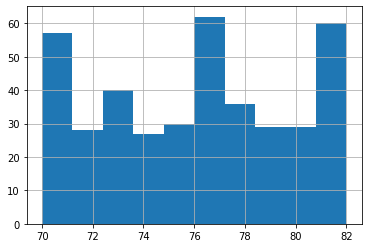

In [ ]:
data['model_year'].hist()

In [ ]:
data['year_range']=pd.cut(data['model_year'], bins=3)

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,year_range
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"(69.988, 74.0]"
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"(69.988, 74.0]"
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"(69.988, 74.0]"
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"(69.988, 74.0]"
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"(69.988, 74.0]"


In [ ]:
data['year_range']

0      (69.988, 74.0]
1      (69.988, 74.0]
2      (69.988, 74.0]
3      (69.988, 74.0]
4      (69.988, 74.0]
            ...      
393      (78.0, 82.0]
394      (78.0, 82.0]
395      (78.0, 82.0]
396      (78.0, 82.0]
397      (78.0, 82.0]
Name: year_range, Length: 398, dtype: category
Categories (3, interval[float64]): [(69.988, 74.0] < (74.0, 78.0] < (78.0, 82.0]]

In [ ]:
data.drop(columns={'model_year'},axis=1,inplace=True)

In [ ]:
reg_data=pd.get_dummies(data).copy()
reg_data.dropna(axis=0,inplace=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


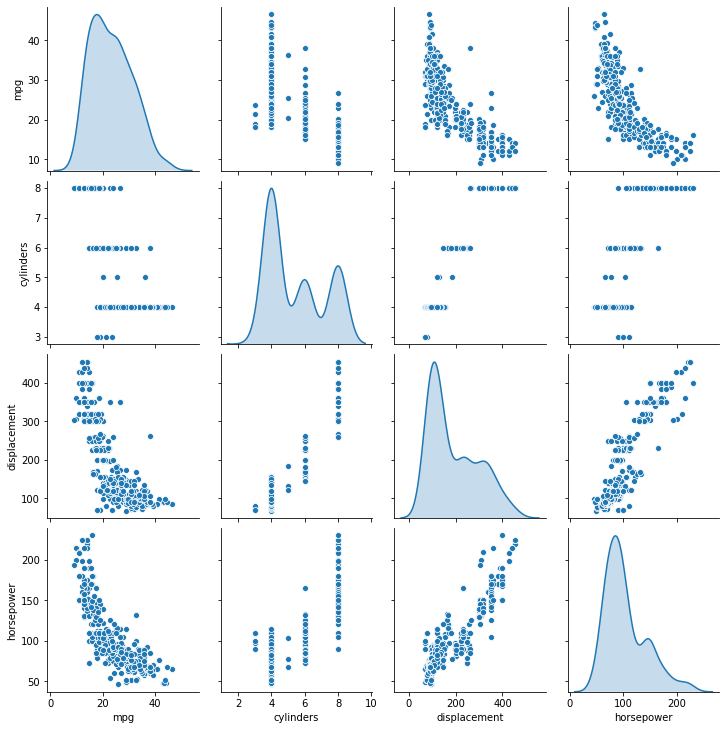

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[["mpg", "cylinders", "displacement", "horsepower"]], diag_kind="kde")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y=reg_data.pop('mpg').values
X=scaler.fit_transform(reg_data.values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X.shape

(392, 11)

# Red Neuronal Simple

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

print('Tensorflow Version : ',tf.__version__)

def build_model(input_dim,learning_rate=0.001):
    model = keras.Sequential([
        layers.Dense(8,activation='relu', input_shape=[input_dim]),
        layers.Dense(8,activation='relu'),
        layers.Dense(1,activation='linear')
      ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

Tensorflow Version :  2.3.0


In [ ]:
!nvidia-smi

Sat Aug 22 15:03:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
model = build_model(X.shape[1])

print("[INFO] training model...")
history=model.fit(x=X_train, y=y_train, validation_split=0.2,epochs=100,shuffle=True, batch_size=32,verbose=0)
print("[DONE] training model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

[INFO] training model...
[DONE] training model...


In [ ]:
X.shape[0]//32

12

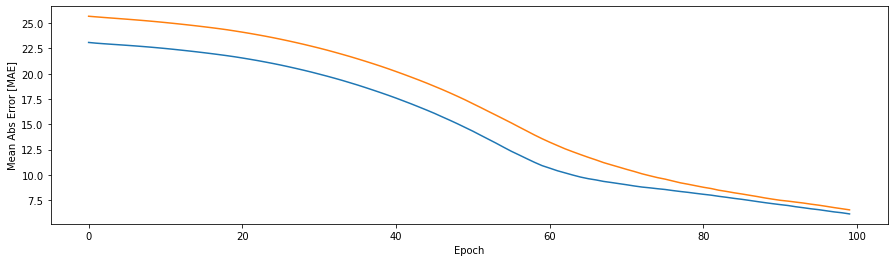

In [ ]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MAE]')
plt.plot(hist['epoch'], hist['mae'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')

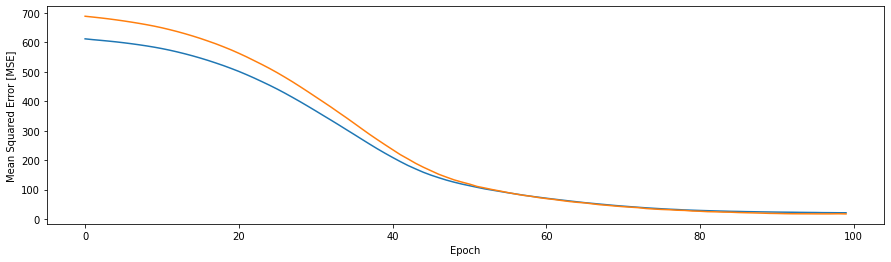

In [ ]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error [MSE]')
plt.plot(hist['epoch'], hist['mse'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')

r^2 on test data : 0.124646


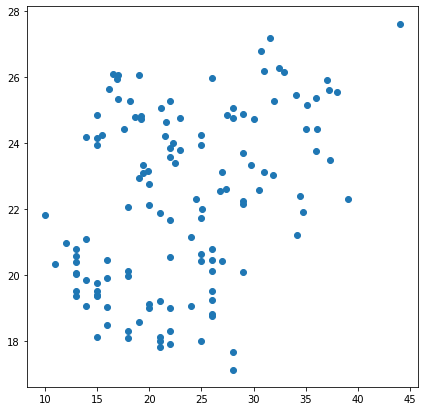

In [ ]:
from sklearn.metrics import r2_score

y_hat=model.predict(X_test)
r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)
plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))

# Red Neuronal Regularizacion

In [ ]:
def build_regularized_model(input_dim,learning_rate=0.001,l1=1e-5,l2=1e-4):
    model = keras.Sequential([
        layers.Dense(64,activation='relu', input_shape=[input_dim]),
        layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),),
        layers.Dense(1,activation='linear')
      ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [ ]:
model = build_regularized_model(X.shape[1],l2=1e-1,l1=1e-2)
print("[INFO] training regularized model...")
history=model.fit(x=X_train, y=y_train, validation_split=0.2,epochs=100, batch_size=32,verbose=0)
print("[DONE] training regularized model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

[INFO] training regularized model...
[DONE] training regularized model...


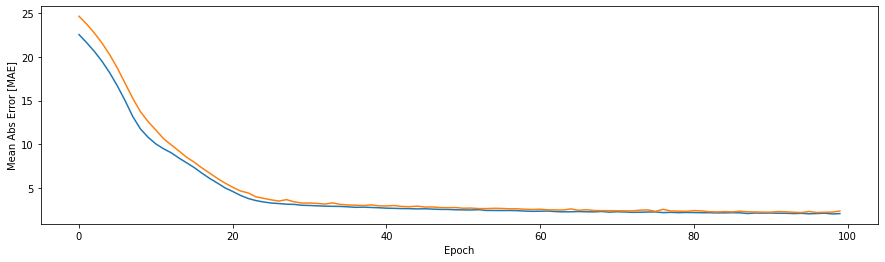

In [ ]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MAE]')
plt.plot(hist['epoch'], hist['mae'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')

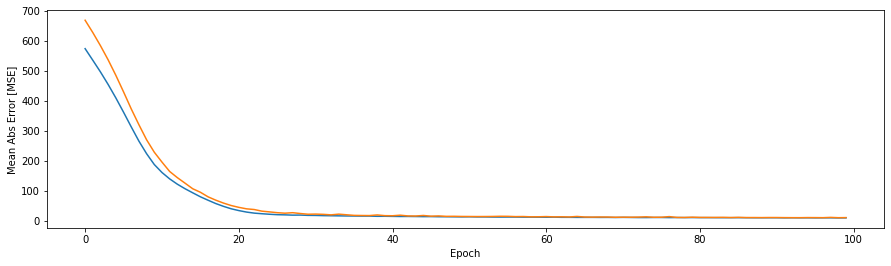

In [ ]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MSE]')
plt.plot(hist['epoch'], hist['mse'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')

r^2 on test data : 0.817787


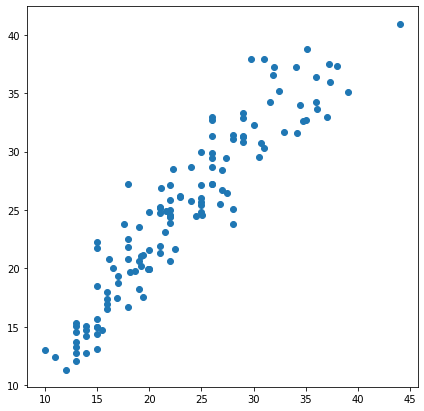

In [ ]:
y_hat=model.predict(X_test)

r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))

In [ ]:
def build_complex_model(input_dim,learning_rate=0.001):
    model = keras.Sequential([
        layers.Dense(1024,activation='relu', input_shape=[input_dim]),
        layers.Dense(1024,activation='relu'),
        layers.Dense(1024,activation='relu'),
        layers.Dense(1,activation='linear')
      ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [ ]:
model = build_complex_model(X.shape[1])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              12288     
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1025      
Total params: 2,112,513
Trainable params: 2,112,513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("[INFO] training complex model...")
history=model.fit(x=X_train, y=y_train, validation_split=0.2,epochs=100, batch_size=32,verbose=0)
print("[DONE] training complex model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

[INFO] training complex model...
[DONE] training complex model...


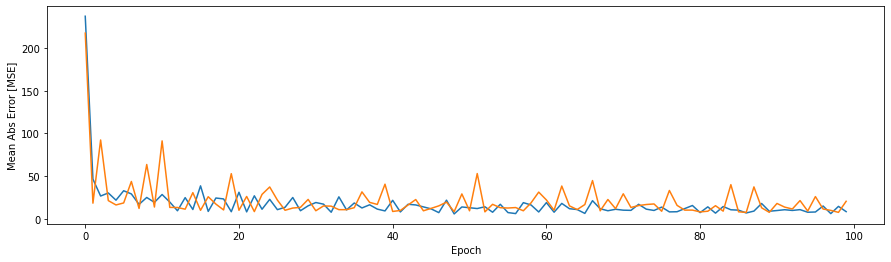

In [ ]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MSE]')
plt.plot(hist['epoch'], hist['mse'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')

r^2 on test data : 0.761301


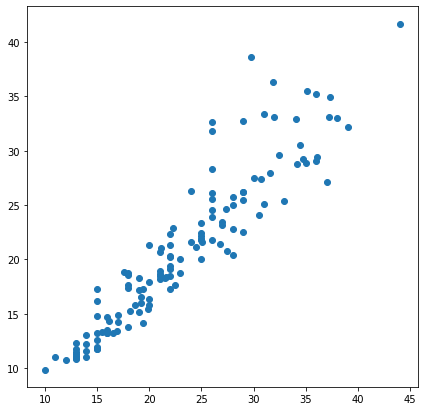

In [ ]:
y_hat=model.predict(X_test)

r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))

# Auto Keras

In [23]:
from keras.backend import clear_session
from keras.models import Sequential
import optuna

def objective(trial):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    l1=trial.suggest_float("l1", 1e-5, 1e-1, log=True)
    l2=trial.suggest_float("l2", 1e-4, 1e-1, log=True)
    num_input = trial.suggest_int("n_input", 4, 128, log=True)
    num_hidden = trial.suggest_int("n_hidden", 4, 128, log=True)
    model = Sequential()
    input_dim=X_train.shape[1]
    model.add(layers.Dense(num_input,activation='relu',input_shape=[input_dim]))
    model.add(layers.Dense(num_hidden,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
    model.add(layers.Dense(1,activation='linear'))
    # We compile our model with a sampled learning rate.
    lr = trial.suggest_float("lr", 1e-4, 1e-1, log=True)
    model.compile(
        loss="mse", optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr), metrics=['mae', 'mse']
    )
    model.fit(
        X_train,
        y_train,
        validation_split=0.2,
        epochs=20,
        shuffle=True,
        batch_size=32,
        verbose=False,
        use_multiprocessing=True,
    )
    # Evaluate the model accuracy on the validation set.
    score = model.evaluate(X_test, y_test, verbose=0)
    return score[1]



In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

[I 2020-08-22 15:56:08,613] Trial 0 finished with value: 3.2507033348083496 and parameters: {'l1': 6.4158881785259e-05, 'l2': 0.0003896833311731326, 'n_input': 53, 'n_hidden': 63, 'lr': 0.0017843778167519048}. Best is trial 0 with value: 3.2507033348083496.
[I 2020-08-22 15:56:10,573] Trial 1 finished with value: 20.707439422607422 and parameters: {'l1': 0.0020323017097501656, 'l2': 0.00016724787541896153, 'n_input': 4, 'n_hidden': 7, 'lr': 0.0017957892201669267}. Best is trial 0 with value: 3.2507033348083496.
[I 2020-08-22 15:56:12,417] Trial 2 finished with value: 12.498123168945312 and parameters: {'l1': 0.000400351962373496, 'l2': 0.00023233587801634685, 'n_input': 128, 'n_hidden': 30, 'lr': 0.00047244654889918165}. Best is trial 0 with value: 3.2507033348083496.
[I 2020-08-22 15:56:14,281] Trial 3 finished with value: 17.161962509155273 and parameters: {'l1': 0.07191196554696364, 'l2': 0.010519748118186928, 'n_input': 37, 'n_hidden': 5, 'lr': 0.0006816612518502685}. Best is trial

Number of finished trials: 100
Best trial:
  Value: 2.021672487258911


In [ ]:
optuna.visualization.plot_contour(study, params=['l1', 'l2'])

In [ ]:
optuna.visualization.plot_contour(study, params=['n_input', 'n_hidden'])

In [ ]:
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

    l1: 3.1059811058252855e-05
    l2: 0.0049041122455272335
    n_input: 10
    n_hidden: 20
    lr: 0.027598814373498804


In [ ]:
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

    l1: 0.008244414779487414
    l2: 0.001079746719476183
    n_input: 4
    n_hidden: 28
    lr: 0.03822283039652684


In [ ]:
def build_auto_model(params):
  clear_session()
  model = Sequential()
  input_dim=X_train.shape[1]
  model.add(layers.Dense(params['n_input'],activation='relu',input_shape=[input_dim]))
  model.add(layers.Dense(params['n_hidden'],activation='relu',
                         kernel_regularizer=regularizers.l1_l2(l1=params['l1'], l2=params['l2'])))
  model.add(layers.Dense(1,activation='linear'))
  lr = params['lr']
  model.compile(loss="mse", optimizer=RMSprop(lr=lr), metrics=['mae', 'mse'])
  return model

model=build_auto_model(study.best_params)
print("[INFO] training auto model...")
history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
                  use_multiprocessing=True,epochs=200, batch_size=32,verbose=0)
print("[DONE] training auto model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


[INFO] training auto model...
[DONE] training auto model...


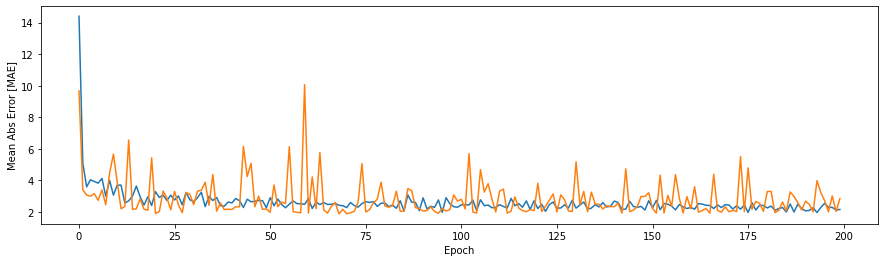

In [ ]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MAE]')
plt.plot(hist['epoch'], hist['mae'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')

r^2 on test data : 0.771977


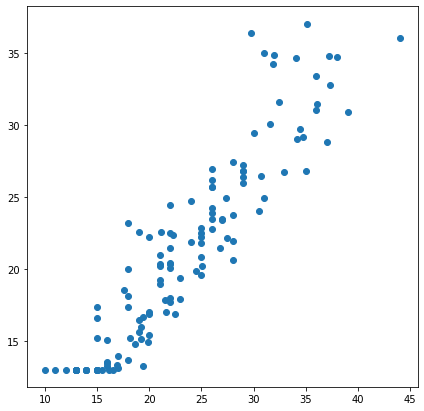

In [ ]:
y_hat=model.predict(X_test)

r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo base para predecir el total de 'nuevos casos por millon de habitantes' a partir de las caracteristicas del pais (edad de la problacion, ingreso per capita, etc).
2. Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo regularizacion.


In [2]:
# Analisis Exploratorio de Casos COVID 

def get_owid_data(download):
    if download:
        data=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
        data.to_csv('covid_owid_data.csv')
    else:
        data=pd.read_csv('covid_owid_data.csv')
    return data

data=get_owid_data(True)

In [3]:
grouped_data=data.groupby(['location']).median()
grouped_data.sort_values(by=['new_cases_smoothed_per_million'],inplace=True,ascending=False)

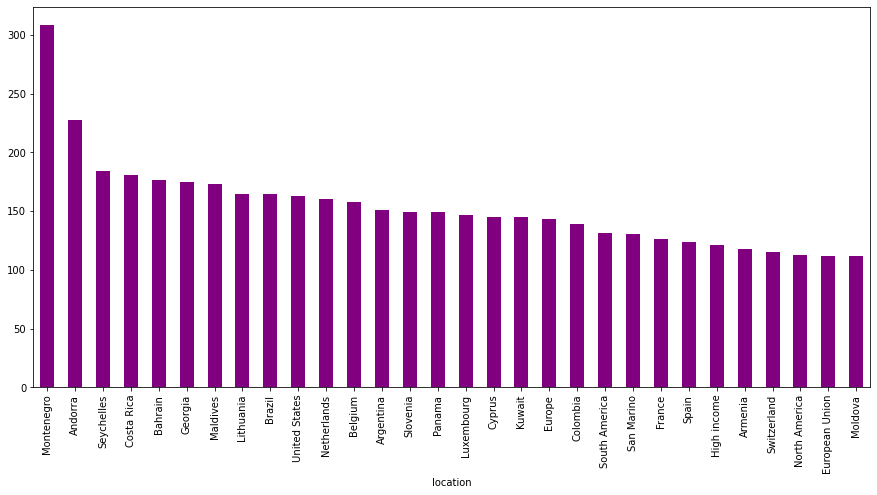

In [5]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,7))
grouped_data['new_cases_smoothed_per_million'].head(30).plot(kind="bar", color='purple')

In [6]:
grouped_data.dtypes

total_cases                                float64
new_cases                                  float64
new_cases_smoothed                         float64
total_deaths                               float64
new_deaths                                 float64
new_deaths_smoothed                        float64
total_cases_per_million                    float64
new_cases_per_million                      float64
new_cases_smoothed_per_million             float64
total_deaths_per_million                   float64
new_deaths_per_million                     float64
new_deaths_smoothed_per_million            float64
reproduction_rate                          float64
icu_patients                               float64
icu_patients_per_million                   float64
hosp_patients                              float64
hosp_patients_per_million                  float64
weekly_icu_admissions                      float64
weekly_icu_admissions_per_million          float64
weekly_hosp_admissions         

In [7]:
cols=['stringency_index','population','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita',
      'extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers',
      'handwashing_facilities','hospital_beds_per_thousand','life_expectancy']
dep='new_cases_smoothed_per_million'

In [8]:
grouped_data.fillna(method='ffill',inplace=True)

In [9]:
grouped_data.fillna(method='bfill',inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
X=scaler.fit_transform(grouped_data[cols].values)
y=np.log1p(grouped_data[dep].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

def build_regularized_model(input_dim,learning_rate=0.001,l1=1e-1,l2=1e-1):
    model = keras.Sequential([
        layers.Dense(32,activation='relu', input_shape=[input_dim]),
        layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l1_l2()),
        layers.Dense(1,activation='linear')
      ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [14]:
model = build_regularized_model(X.shape[1])
print("[INFO] training covid model...")
history=model.fit(x=X_train, y=y_train, validation_split=0.1,epochs=100, batch_size=32,verbose=0)
print("[DONE] training covid model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

[INFO] training covid model...
[DONE] training covid model...


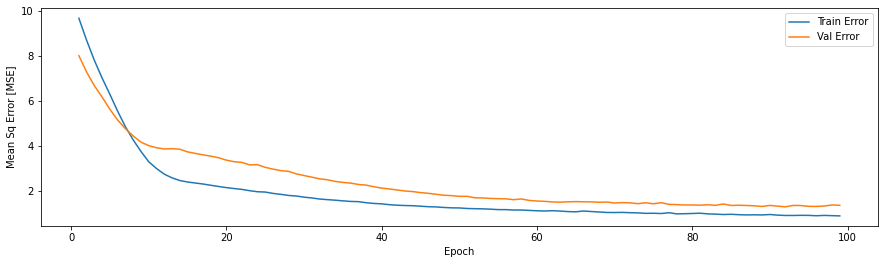

In [15]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Sq Error [MSE]')
plt.plot(hist['epoch'][1:], hist['mse'][1:],label='Train Error')
plt.plot(hist['epoch'][1:], hist['val_mse'][1:],label = 'Val Error')
plt.legend()

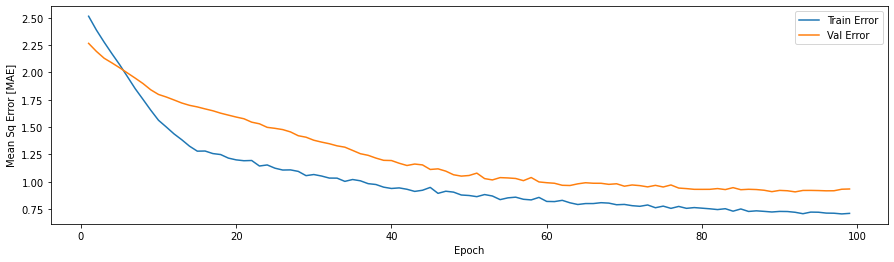

In [16]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Sq Error [MAE]')
plt.plot(hist['epoch'][1:], hist['mae'][1:],label='Train Error')
plt.plot(hist['epoch'][1:], hist['val_mae'][1:],label = 'Val Error')
plt.legend()

r^2 on test data : 0.713512


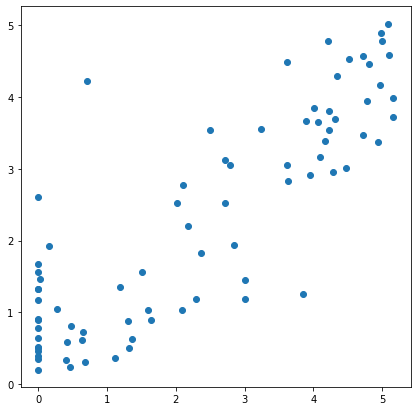

In [18]:
from sklearn.metrics import r2_score

y_hat=model.predict(X_test)

r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))

In [24]:
import optuna 

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

[I 2021-11-12 13:20:41,180] A new study created in memory with name: no-name-4675b3ce-98da-4643-8186-cf418985a446
[I 2021-11-12 13:20:43,090] Trial 0 finished with value: 0.7646073698997498 and parameters: {'l1': 0.005569618345968749, 'l2': 0.00812516965511455, 'n_input': 24, 'n_hidden': 9, 'lr': 0.046392510123966696}. Best is trial 0 with value: 0.7646073698997498.
[I 2021-11-12 13:20:45,246] Trial 1 finished with value: 1.5585284233093262 and parameters: {'l1': 3.743815700824656e-05, 'l2': 0.0002971140553390779, 'n_input': 43, 'n_hidden': 14, 'lr': 0.0005549880993071997}. Best is trial 0 with value: 0.7646073698997498.
[I 2021-11-12 13:20:47,143] Trial 2 finished with value: 1.961571455001831 and parameters: {'l1': 0.028447194509312195, 'l2': 0.00025560280831802976, 'n_input': 104, 'n_hidden': 36, 'lr': 0.00016159570568472534}. Best is trial 0 with value: 0.7646073698997498.
[I 2021-11-12 13:20:48,993] Trial 3 finished with value: 0.9590373039245605 and parameters: {'l1': 0.001324169

Number of finished trials: 100
Best trial:
  Value: 0.6749642491340637


In [26]:
def build_auto_model(params):
  clear_session()
  model = Sequential()
  input_dim=X_train.shape[1]
  model.add(layers.Dense(params['n_input'],activation='relu',input_shape=[input_dim]))
  model.add(layers.Dense(params['n_hidden'],activation='relu',
                         kernel_regularizer=regularizers.l1_l2(l1=params['l1'], l2=params['l2'])))
  model.add(layers.Dense(1,activation='linear'))
  lr = params['lr']
  model.compile(loss="mse", optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr), metrics=['mae', 'mse'])
  return model

model=build_auto_model(study.best_params)
print("[INFO] training auto model...")
history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
                  use_multiprocessing=True,epochs=100, batch_size=32,verbose=0)
print("[DONE] training auto model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

[INFO] training auto model...
[DONE] training auto model...


In [27]:
study.best_params

{'l1': 6.656398675734686e-05,
 'l2': 0.006721398783164829,
 'lr': 0.021228178320677978,
 'n_hidden': 6,
 'n_input': 16}

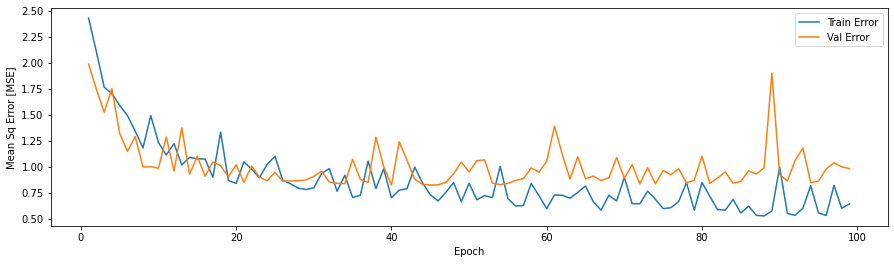

In [30]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Sq Error [MSE]')
plt.plot(hist['epoch'][1:], hist['mse'][1:],label='Train Error')
plt.plot(hist['epoch'][1:], hist['val_mse'][1:],label = 'Val Error')
plt.legend()

r^2 on test data : 0.718980


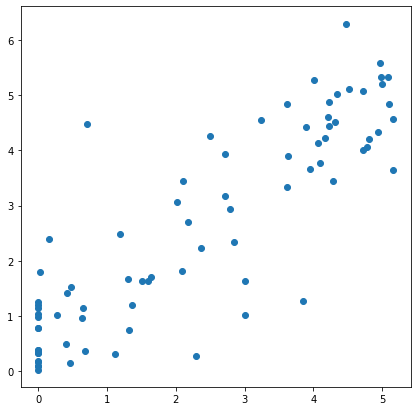

In [31]:
y_hat=model.predict(X_test)

r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))